In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Statistics on comments

In [3]:
#read comments stored in multiple csv files in a folder and concat them all in one df. Remove duplicates if there are any.

In [4]:
def read_folder(csv_folder):
    ''' Input is a folder with csv files; return list of data frames.'''
    csv_folder = Path(csv_folder).absolute()
    csv_files = [f for f in csv_folder.iterdir() if f.name.endswith('csv')]
    # the assign() method adds a helper column
    dfs = [
        pd.read_csv(csv_file)for idx, csv_file in enumerate(csv_files, 1)
    ]
    return dfs

In [5]:
def concat_csv_files(folder_name='data_raw/comments'):
    dfs = read_folder(folder_name)
    all_comments_df = pd.DataFrame()
    for df in dfs:
        df = df.drop(['Unnamed: 0'], axis=1)
        all_comments_df = pd.concat([all_comments_df, df]).drop_duplicates().reset_index(drop=True) 
    return all_comments_df

In [6]:
all_comments_df = concat_csv_files()

In [8]:
all_comments_df.head()

,id,replyCount,likeCount,published_at,author_name,text,authorChannelId,is_reply,threadId,video_id,cleaned,video_published_at
0,UgywNFvDx6m3xktYSk94AaABAg,500.0,156044.0,2018-02-28 20:58:58,Prince Ea,What steps are you taking to help fight climate change?,UCDgUAAHgsV2fFZQm2fIWBnA,0.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
1,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9JDNIoqHA8G,NaN,0.0,2021-02-01 11:28:07,Just drink bleach,h,UC03tXMLELmpXAjZtJ-uKgPw,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
2,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9IyLzqc-h52,NaN,0.0,2021-01-26 06:08:48,janvi selokar,What is the solution of these problems ........ We have to find solutions instead of talking about problem,UChqrKXpAUcqSsdg6nIg4BOA,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
3,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9HSLkZuhk6z,NaN,1.0,2020-12-19 14:00:23,RangeBlox,Hi,UCzvVfRELHQVyiUrwg6bLH9Q,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN
4,UgywNFvDx6m3xktYSk94AaABAg.8dDnrTKvSnb9HNxmpcfjeF,NaN,1.0,2020-12-17 21:05:16,scorpionrealms,I'm 500 retards,UCqc926XzPh7kCtdpv_aFZcw,1.0,UgywNFvDx6m3xktYSk94AaABAg,eRLJscAlk1M,NaN,NaN


In [7]:
all_comments_df.shape

(230599, 12)

In [ ]:
all_comments_df.

In [47]:
def stats(name_csv_or_df: "pd.DataFrame or str") -> pd.DataFrame:
    """
    Creates basic statistics for a given DataFrame or csv file.
    """
    if(isinstance(name_csv_or_df, str)):
        df = pd.read_csv('data_raw/' + name_csv_or_df)
        name = name_csv_or_df
    elif(isinstance(name_csv_or_df, pd.DataFrame)):
        df = name_csv_or_df
        name = None
    else:
        raise TypeError("stats() takes pandas.DataFrame or string as input.")
        
    num_comments = df.shape[0]
    num_authors = len(df.authorChannelId.value_counts())
    num_single_comment_authors = sum(df.authorChannelId.value_counts()==1)
    return pd.DataFrame([[name, num_comments, num_authors, num_single_comment_authors, num_comments/num_authors, df.authorChannelId.value_counts()[0], df.authorChannelId.value_counts().index[0]]], columns=["csv_name", "number_comments", "number_authors", "number_single_comment_authors", "average_comment_count", "most_comments", "user_with_most_comments"]) 

In [46]:
sum(all_comments_df.authorChannelId.value_counts()>30)

66

In [48]:
stat = stats(all_comments_df)

In [49]:
stat

,csv_name,number_comments,number_authors,number_single_comment_authors,average_comment_count,most_comments,user_with_most_comments
0,None,230599,154221,131773,1.49525,265,UCkPfRRBktyFLp0ekUcjkJMw


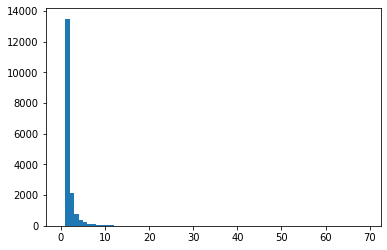

In [11]:
hist = plt.hist(all_comments_df.author_name.value_counts(), bins=[i for i in range(stat.most_comments[0])] )

In [8]:
df = all_comments_df
g = df.groupby(["author_name", "text"]).size().reset_index()
g[g[0]>10]

,author_name,text,0
25066,Bolt LP,This is unrelated but can you comment In this video A in brackets like this: [A] would be greatly appreciated! https://youtu.be/PRQP-UPy6cQ,13
35728,Coco brt,this video shows the evolution of carbon dioxide from 1960 to 2019 https://www.youtube.com/watch?v=Lt_Pq13phGY&t=25s,12
42781,Darren's General Info,Fun fact: Bees can fly higher than Mount Everest I have made a video dedicated to fun facts,13
56493,Exemplary Nature,"https://youtu.be/mLEpzTRKZs8 Save environment save earth, Please watch my video to see the face of Nature.",11
68796,HOLYbots,e,24
87398,Johnny Axon,It is what it is,21
97638,Kony Church,"Please watch my video titled: ""Lies We Live In"" https://youtu.be/SLXQRPnK_Lc",97
100604,Laura,Share this video,14
183695,Willian da rosa,"People use ecosia, it is a search engine like google, the diferrence is that it uses the money get from 45 searches made by its users to plant 1 tree!",11
183697,Willian da rosa,"use ecosia, it is a search engine like google, the diferrence is that it uses the money get from 45 searches made by its users to plant 1 tree!",14


In [ ]:
g = df.groupby(["author_name", "video_id"]).size().reset_index()
g[g[0]>10]

In [ ]:
# Look closer at one comment. All posted by the same user:
df[df.text=="Big Guy and  his side kick Kamel toe Harris making CHINA Great again ...."]

In [ ]:
df[df.text=="planet will warm up and it will be Paradise time again"]

In [57]:
# Users who commented under more than a single video:
g = all_comments_df.groupby(["authorChannelId"])["video_id"].nunique().reset_index()
#g[g.video_id>1]

In [61]:
g[g.video_id>1]

,authorChannelId,video_id
10,UC--Hjd_dlxYRos2gmf_s5Xw,2
352,UC-8Mg8rGErbHkdnd8QUDm2A,2
382,UC-98d-FrZK5XnQWtxmaqG2A,2
1140,UC-RmoALW8IDAxJIkGueY3vw,2
1688,UC-fz3Oo36uKr8qEG-WmxVXg,2
1892,UC-lM8-xulfKrowKh8Wc0wOg,2
1948,UC-n8Mf1eoZ5e9VeTRXl2fyQ,2
2745,UC07rRzxPwobA3La_AOh3OnQ,2
3097,UC0GpK82-At-guMQWpsmtFRg,2
3661,UC0Vh1UAjZHG4XFNGJd7yRQg,2


In [29]:
g[g.video_id>5]

,author_name,text,video_id
150719,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",6


In [31]:
df[df.author_name=="Sam Lair"]

,id,threadId,published_at,author_name,text,likeCount,is_reply,cleaned,video_id,video_published_at
10181,UgzQ76ASEto9SR9kT8B4AaABAg,UgzQ76ASEto9SR9kT8B4AaABAg,2019-12-25T18:11:28Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",0.0,0.0,NaN,MIA_1xQc7x8,NaN
11520,UgyzXi6LCJ8EuJx2Hs14AaABAg,UgyzXi6LCJ8EuJx2Hs14AaABAg,2020-02-05T20:14:31Z,Sam Lair,"What if global warming is a hoax and we create a better world for nothing; but, what it isn’t a hoax and we do nothing.",0.0,0.0,NaN,bvutiLuch_E,NaN
12701,UgwB1Lxqj4AW2qDIDgV4AaABAg,UgwB1Lxqj4AW2qDIDgV4AaABAg,2019-12-25T18:11:04Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",0.0,0.0,NaN,3tnDjCA4peY,NaN
13477,UgyZfIGiXiaFRfbJ_9B4AaABAg,UgyZfIGiXiaFRfbJ_9B4AaABAg,2020-11-12T19:52:05Z,Sam Lair,Overpopulation and overconsumption fueled by fossil fuels will only decrease when events occur on a wide enough scale to dramatically and permanently curtail various greenhouse gas emissions. \nhttps://samslair.blogspot.com/2020/07/agw-is-sanity-even-possible.html?m=1,0.0,0.0,NaN,1DdfNU5iATU,NaN
13535,UgzkozbBDQtwl2wMi554AaABAg,UgzkozbBDQtwl2wMi554AaABAg,2019-12-25T18:05:56Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly perceived as the Great Satan for blocking international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",0.0,0.0,NaN,1DdfNU5iATU,NaN
14799,UgzmBk8BnapBMs4CtSN4AaABAg,UgzmBk8BnapBMs4CtSN4AaABAg,2019-12-25T18:19:49Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be increasingly “perceived” as the Great Satan for “blocking” international climate change mitigation (especially in those regions that are already experiencing strong early global warming symptoms). Though China and India are the bigger AGW problem, they are perceived less and less as such because they aren’t blatantly rejecting the Paris Climate Agreement (the U.S. withdrawal becomes final on November 4, 2020 / the day after the election — thus, making AGW a prime issue, which the Democrats will squander the political capital of by overplaying garish social issues).",2.0,0.0,NaN,YwmrYeDZp5M,NaN
14921,UgxKhGoTdT_40833R054AaABAg,UgxKhGoTdT_40833R054AaABAg,2019-12-25T18:28:58Z,Sam Lair,"As the Fear Factor in the world ‘ramps up’ regarding AGW, the United States will be 

In [28]:
df.video_id.value_counts().to_csv("video_ids.csv")

In [31]:
df[df.author_name=="amf"].text.iloc[0]

'Would you bet your paycheck on a weather forecast for tomorrow? If not, then why should this country bet billions on global warming predictions that have even less foundation?'

In [32]:
df[df.author_name=="amf"].text.iloc[-1]

'Joe Biden once called state-mandated school integration “the most racist concept you can come up with,” and Barack Obama “the first sort of mainstream African American who is articulate and bright and clean.” He was a staunch opponent of “forced busing” in the 1970s, and leading crusader for mass incarceration throughout the ‘80s and ‘90s. Uncle Joe has described African-American felons as “predators” too sociopathic to rehabilitate — and white supremacist senators as his friends.⬅'

In [62]:
df[df.author_name=='reference2me']

,id,replyCount,likeCount,published_at,author_name,text,authorChannelId,is_reply,threadId,video_id,cleaned,video_published_at
165018,UgxN-qaXhFpdUvcf7Nh4AaABAg,NaN,0.0,2019-05-25T05:30:12Z,reference2me,Al Gore made a BILLION dollars with Cap and Trade ... he should go and enjoy it ...,NaN,1.0,UgxN-qaXhFpdUvcf7Nh4AaABAg,cVkAsPizAbU,NaN,NaN
165240,UgzYZGNlKlMMRWPzU6J4AaABAg,NaN,3.0,2018-04-03T09:51:59Z,reference2me,Al Gore made a billion dollars with Cap and Trade .... Tax payers tax money,NaN,1.0,UgzYZGNlKlMMRWPzU6J4AaABAg,cVkAsPizAbU,NaN,NaN
165241,UgzYZGNlKlMMRWPzU6J4AaABAg,NaN,2.0,2018-04-03T09:48:29Z,reference2me,Al Gore made a billion dollars with Cap and Trade ... it's always about money ...,NaN,1.0,UgzYZGNlKlMMRWPzU6J4AaABAg,cVkAsPizAbU,NaN,NaN
211861,Ugh8Fq9JZ-QhNHgCoAEC,NaN,0.0,2017-06-01T14:35:41Z,reference2me,to many big companies get subsidies to let this go .... the tax payers are the big losers... again,NaN,0.0,Ugh8Fq9JZ-QhNHgCoAEC,eIJ_sxzUZuI,NaN,NaN
213106,UgijC3pKT5jZWXgCoAEC,NaN,0.0,2020-11-24T22:30:59Z,reference2me,yeah ... the bill goes to America ....,NaN,1.0,UgijC3pKT5jZWXgCoAEC,MIA_1xQc7x8,NaN,NaN
214354,Ugi5DxYircYHpHgCoAEC,NaN,0.0,2017-06-04T01:56:18Z,reference2me,I have lived in Florida the past 35 years ... close to the ocean ....I have Not seen a temperature change or the ocean shore moving .... we are at the end of an ice age and in 100 or so years the world should look like it did before the ice age ...which is not that much different than now ...,NaN,0.0,Ugi5DxYircYHpHgCoAEC,bvutiLuch_E,NaN,NaN
215999,UgysnlK5Pb-Jd8y-xkh4AaABAg,NaN,4.0,2020-11-24T22:27:37Z,reference2me,Check out the Paris agreement yourself ... the USA gets the bill and the money goes to the Africa elite ...,NaN,0.0,UgysnlK5Pb-Jd8y-xkh4AaABAg,HzLEYJE33ww,NaN,NaN
218026,UgwRJjGTaYiTG9BPzWB4AaABAg,NaN,0.0,2018-03-27T13:16:40Z,reference2me,Map at 5:53 is Before the ice age ...we are now at the end of an ice age and when all the ice has melted it will look again like it did Before the ice age ... yes we will lose below sea level land ... most of the bottom part of Florida is swamp land now...,NaN,0.0,UgwRJjGTaYiTG9BPzWB4AaABAg,Sr2J_1J9w3A,NaN,NaN
219221,UgjrdvYR6O8VVngCoAEC,NaN,0.0,2018-03-27T13:42:39Z,reference2me,phones are computers now ....how much did you pay for your computer?,NaN,1.0,UgjrdvYR6O8VVngCoAEC,Sr2J_1J9w3A,NaN,NaN
223529,UgiKRIpNLleqo3gCoAEC,NaN,0.0,2017-01-31T15:39:25Z,reference2me,"Money rules ... I was involved in a think tank in Hartford Conn. years ago and at he end filled out a form of questions ... the last question was ...""What else can we tax?""",NaN,0.0,UgiKRIpNLleqo3gCoAEC,47bNzLj5E_Q,NaN,NaN
